In [29]:
"""Jupyter Notebook for finding the hard-soft boundary 
    we will use to define our binary population given by cosmic
    HS Cutoff period should be longer for OCs (less dense) 
    and shorter for GCs (more densely packed)"""

'Jupyter Notebook for finding the hard-soft boundary \n    we will use to define our binary population given by cosmic\n    HS Cutoff period should be longer for OCs (less dense) \n    and shorter for GCs (more densely packed)'

In [30]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import multidim
from cosmic.evolve import Evolve

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Dictionary neeeded for evolving the binaries
BSEDict = {'xi': 0.5, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 0,\
           'alpha1': 1.0, 'pts1': 0.05, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, \
           'hewind': 1.0, 'ck': -1000, 'bwind': 0.0, 'lambdaf': 1.0, 'mxns': 3.0, \
           'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'nsflag': 3, 'ceflag': 0, 'eddfac': 1.0, \
           'merger': 0, 'ifflag': 0, 'bconst': -3000, 'sigma': 265.0, 'gamma': -2.0, \
           'ppsn': 1, 'natal_kick_array' :[-100.0,-100.0,-100.0,-100.0,-100.0,-100.0], \
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, \
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],\
           'cekickflag' : 0, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsnp' : 2.5, \
           'ecsn_mlow' : 1.6, 'aic' : 1, 'sigmadiv' :-20.0}

In [33]:
final_kstar1 = [11,12]
final_kstar2 = [10]

# Sampling initial binaries - pulled from cosmic's documentation
InitialBinaries, sampled_mass, n_sampled = InitialBinaryTable.sampler('multidim', [0,14], [0,14], \
                            2,1, SFH_model='delta_burst', \
                            component_age=10000.0, met=0.02, size=60000)

In [34]:
p_i = InitialBinaries['porb'] #given in days *i think: https://cosmic-popsynth.github.io/examples/index.html


Text(0.5, 0, 'Input Periods (log-days)')

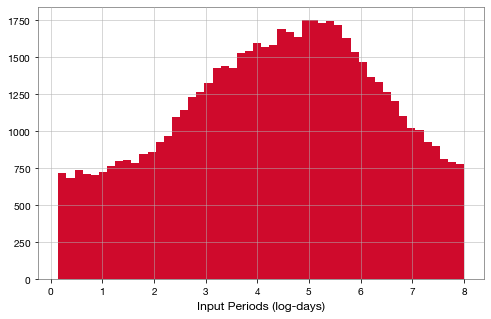

In [40]:
# Initial Binary Period Histogram
f,ax = plt.subplots(figsize = (8,5))

ax.hist(np.log10(p_i), bins = 50, color = '#CF0A2C')
ax.set_xlabel('Input Periods (log-days)')

# Cutoff periods must be set by cosmic

In [36]:
# Evolving the binaries
bpp, bcm, initC  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

In [37]:
p_f = bcm['porb']
print(p_f.loc[np.where(p_f <0)])

Series([], Name: porb, dtype: float64)


Text(0.5, 0, 'Evolved periods (log-days)')

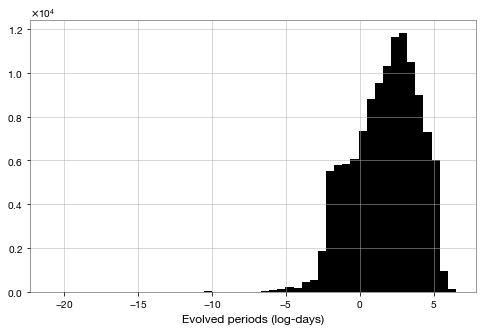

In [42]:
# Evolved Binary Histogram - Period

f,ax = plt.subplots(figsize = (8,5))
ax.hist(np.log10(p_f), bins = 50, color = 'black')

ax.set_xlabel('Evolved periods (log-days)')

In [57]:
EvolvedBinaries = bcm#Making copy of bcm to manipulate


In [60]:
# Using hard-soft cutoff from Aaron's paper: arXiv:1506.08830
m1_f = bcm['mass_1']
m2_f = bcm['mass_2']

# Total mass of evolved binaries
m3 = m1_f.add(m2_f)#Duplicates present with different t
EvolvedBinaries['m3'] = m3


         tphys  kstar_1    mass0_1     mass_1   lumin_1     rad_1    teff_1  \
0          1.0      0.0   0.330938   0.330938 -1.804221 -0.490330  3.557380   
0      10000.0      0.0   0.330938   0.330938 -1.799737 -0.487773  3.557222   
1          1.0      1.0   1.199814   1.199814  0.222256  0.056987  3.790340   
1      10000.0     10.0   0.374072   0.374072 -4.129496 -1.783518  3.622655   
2          1.0      0.0   0.323627   0.323627 -1.822556 -0.497219  3.556240   
2      10000.0      0.0   0.323627   0.323627 -1.818292 -0.494778  3.556085   
3          1.0      0.0   0.175684   0.175684 -2.375120 -0.677177  3.508078   
3      10000.0      0.0   0.175684   0.175684 -2.373915 -0.676466  3.508024   
4          1.0      0.0   0.361816   0.361816 -1.730798 -0.461857  3.561499   
4      10000.0      0.0   0.361816   0.361816 -1.725282 -0.458772  3.561335   
5          1.0      1.0   3.686709   3.686709  2.242548  0.347114  4.150350   
5      10000.0     11.0   0.828147   0.828147 -5.227

In [63]:
# Getting cluster velocity dispersion values will loop through to find hs cutoff
import pandas as pd
GC_sigma = pd.read_csv('/Users/andrewbowen/ceb_project/cosmic_pop/gc-sigma.txt', names = ['index','sigma_v'])
OC_sigma = pd.read_csv('/Users/andrewbowen/ceb_project/cosmic_pop/oc-sigma.txt', names = ['index','sigma_v'])

# Pulling only sigma values (no indices)
gc_sigma = GC_sigma['sigma_v']
oc_sigma = OC_sigma['sigma_v']

print(gc_sigma)

0      12.388962
1       0.000000
2      11.187387
3       0.000000
4       6.667342
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9      11.411948
10      7.883908
11      3.439950
12      5.457761
13      0.000000
14      0.000000
15     16.673228
16      0.000000
17      0.000000
18      4.847198
19      0.000000
20      0.000000
21      3.444542
22      4.640216
23      0.000000
24      4.626147
25      6.606004
26      6.975154
27      2.042282
28     13.518913
29      7.529252
         ...    
127     6.000048
128     9.357500
129     0.000000
130     6.438904
131     0.000000
132     6.388262
133    13.011301
134     3.774333
135     6.177821
136     0.000000
137     7.777288
138     7.383591
139     5.765937
140     0.000000
141     0.000000
142     0.000000
143     5.106917
144     0.000000
145     0.000000
146     3.136052
147    10.212815
148     5.758525
149     3.938549
150     0.000000
151     0.000000
152     0.000000
153     6.540604
154     0.0000

In [69]:
# Use sigma = 1km/s for now, will plug in cluster values later
def get_Phs(m1, m2, m3, sigma):
    Phs = (np.pi*(6.67*10**-20)/2)*((m1*m2/m3)**(3/2))/(np.sqrt(m1+m2)*sigma**3)
    return Phs


In [70]:
names_gc = ['ID_x', 'Name', 'RA', 'DEC', 'L','B','R_Sun','R_gc','X','Y', 'Z', 'key_0','[Fe/H]_x', 'wt', 'E(B-V)_x',\
 'V_HB','(m-M)V_x', 'V_t', 'M_V,t', 'U-B', 'B-V', 'V-R', 'V-I', 'spt', 'ellip', 'ID_y', 'v_r', '+/-', 'v_LSR' ,'sig_v' ,'+/-.1', 'c', 'r_c', 'r_h', 'mu_V',\
  'rho_', 'lg(tc)', 'lg(th)', 'Mcl[Msun]', 'rh[pc]', '[Fe/H]_y', 'age[Gyr]', '(m-M)V_y', 'E(B-V)_y', 'log10(rho[Msun]/pc^3)',\
 'rc', 'sigma0[km/s]', 'esigma0[km/s]', 'fb', 'efb', '[M/H]', 'Rgc[kpc]','Rsun[kpc]']

# names in OC datafile
names_oc = ['Cluster_name', 'RA', 'DEC', 'l', 'b', 'Dist Mod', 'EB-V', 'Age', 'ST' ,'Z', 'Diam', 'Fe/H', 'MRV',\
 'pm RA', 'pm Dec', 'logM[Msun]', 'rtP[pc]', 'log(t[yr])K', 'rcK[pc]', 'rtK[pc]', 'Rhm[pc]',\
  '[Fe/H]K]', 'deltaV', 'sigdV', '[FeH]', 'sigFeH', 't', 'sigt', 'logt' ,'Rgc' ,'z' ,'Diam[pc]', 'd[pc]']
path = '/Users/andrewbowen/ceb_project/cosmic_pop/'

# Globular cluster read in
GCs = pd.read_csv(path + 'gc_data.txt', sep = ' ', header = 0, names = names_gc)
# Open Cluster file read in
OCs = pd.read_csv(path + 'oc_data.txt', sep = ' ', header = 0)

In [75]:
# Looping through Globular Clusters
p = []
for index, row in EvolvedBinaries.iterrows():
    m1 = row['mass_1'] * (2*10**30)
    m2 = row['mass_2'] * (2*10**30)
    m3 = row['m3'] * (2*10**30)
    period_cutoff = get_Phs(m1, m2, m3, 2.28)
    p.append(period_cutoff)
    print(period_cutoff)

1092174371.4976935
1092174371.4976935
1064399667.0488437
1101642485.9320478
1177123499.1471913
1177123499.1471913
576091789.8352331
576091789.8352331
1012614722.847369
1012614722.847369
4488664167.211553
3619716092.7851057
1924758514.8272064
1924758514.8272064
542706437.0280043
542706437.0280043
2611221641.148057
2611221641.148057
889369586.5640194
889369586.5640194
794816062.5557365
794816062.5557365
1425186264.7868657
1425186264.7868657
3072459225.7577033
0.0
3616046937.8091555
3616046937.8091555
1610155576.6570363
1610155576.6570363
1025790715.5698694
1025790715.5698694
4085668324.3017573
4085668324.3017573
472148951.81681204
472148951.81681204
1622852690.8778205
1622852690.8778205
2333410931.0460606
2333410931.0460606
903054216.6397263
903054216.6397263
4772985611.203855
0.0
736445956.809535
736445956.809535
3446403946.9996676
3446403946.9996676
4610711879.430294
2898505557.921701
1144664292.8944356
1144664292.8944356
825310893.0736107
825310893.0736107
18126285726.0365
0.0
8644313

ZeroDivisionError: float division by zero

/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5, 0, 'Period cutoffs for evolved binaries (log-days)')

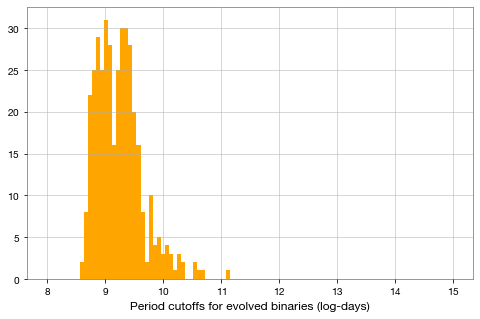

In [86]:
f,ax = plt.subplots(figsize = (8,5))
ax.hist(np.log10(p), bins = 100,range = (8,15), color = 'orange')
ax.set_xlabel('Period cutoffs for evolved binaries (log-days)')